In [1]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from metrics import top_3_acc
from os import listdir
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from cv2 import GaussianBlur
%matplotlib inline

/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/filipgulan/.virtualenvs/deep-learning/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
DATASET_PATH = "/Users/filipgulan/Downloads/test"
OUTPUT_PATH = "/Users/filipgulan/test_class"

In [3]:
from keras.models import model_from_json
json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../models/weights_ep05.hd5f")
print("Loaded model from disk")

Loaded model from disk


In [4]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {'HyVee': 8, 'Target': 19, 'CVSPharmacy': 2, 
          'Wegmans': 22, 'HEB': 6, 'StopShop': 18, 'BJs': 1, 
          'Albertsons': 0, 'FredMeyer': 4, 'Walgreens': 20, 
          'KingSoopers': 10, 'Walmart': 21, 'Safeway': 14, 
          'ShopRite': 16, 'Costco': 3, 'SamsClub': 15, 
          'WinCoFoods': 24, 'HarrisTeeter': 7, 'WholeFoodsMarket': 23,
          'Kroger': 11, 'Smiths': 17, 'Meijer': 12, 
          'Publix': 13, 'Frys': 5, 'JewelOsco': 9}

class_labels = {v: k for k, v in labels.items()}

In [ ]:
input_size = (229, 261)
batch_size = 50

def crop_upper_part(image, percent=0.4):
    height, _, _ = image.shape
    point = int(percent * height)
    return image[0:point,:]

def preprocess_image(image):
    img_array = img_to_array(image).astype(np.uint8)
    img_array = GaussianBlur(img_array, (3, 3), 0)
    img_array = crop_upper_part(img_array, 0.3)
    return array_to_img(img_array)
    
datagen = ImageDataGenerator(preprocessing_function=preprocess_image,
                             samplewise_center=True,
                             samplewise_std_normalization=True)

gen_flow = datagen.flow_from_directory(
        DATASET_PATH, 
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

predict = model.predict_generator(gen_flow, steps=200)
predicted_classes = np.argmax(predict, axis=1)

Found 10000 images belonging to 1 classes.


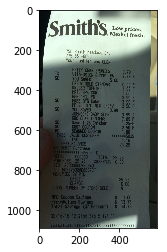

Filename: Dataset/0.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: CVSPharmacy conf: 8.474021e-22
Top 3 class: Frys conf: 7.0903636e-22


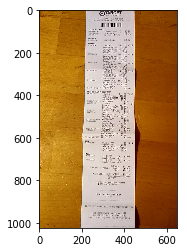

Filename: Dataset/1.jpg
Top 1 class: Target conf: 1.0
Top 2 class: HyVee conf: 1.22073724e-23
Top 3 class: StopShop conf: 8.667988e-24


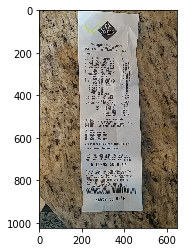

Filename: Dataset/10.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: Albertsons conf: 2.233564e-11
Top 3 class: Safeway conf: 1.5894046e-12


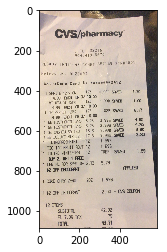

Filename: Dataset/100.jpg
Top 1 class: CVSPharmacy conf: 1.0
Top 2 class: HarrisTeeter conf: 3.481359e-27
Top 3 class: StopShop conf: 6.565379e-28


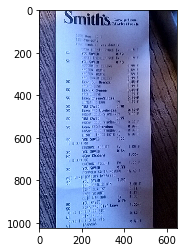

Filename: Dataset/1000.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Frys conf: 3.633774e-15
Top 3 class: CVSPharmacy conf: 9.3310526e-17


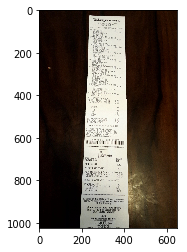

Filename: Dataset/1001.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: HarrisTeeter conf: 6.4013924e-12
Top 3 class: FredMeyer conf: 5.0504913e-12


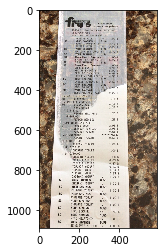

Filename: Dataset/1002.jpg
Top 1 class: Frys conf: 1.0
Top 2 class: HyVee conf: 3.7052844e-17
Top 3 class: KingSoopers conf: 3.4898733e-17


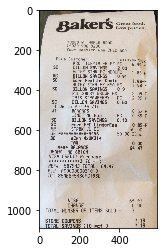

Filename: Dataset/1003.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Frys conf: 6.6863715e-09
Top 3 class: CVSPharmacy conf: 3.602554e-11


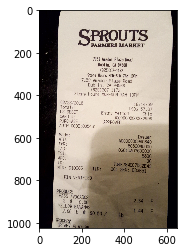

Filename: Dataset/1004.jpg
Top 1 class: Costco conf: 0.85655004
Top 2 class: WholeFoodsMarket conf: 0.09054375
Top 3 class: Smiths conf: 0.008264512


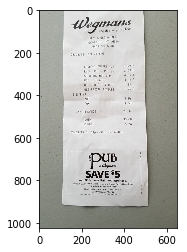

Filename: Dataset/1005.jpg
Top 1 class: Wegmans conf: 1.0
Top 2 class: Safeway conf: 5.965299e-19
Top 3 class: HyVee conf: 1.3608729e-19


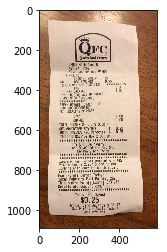

Filename: Dataset/1006.jpg
Top 1 class: BJs conf: 0.9997037
Top 2 class: ShopRite conf: 0.00024233965
Top 3 class: KingSoopers conf: 5.311857e-05


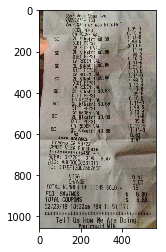

Filename: Dataset/1007.jpg
Top 1 class: Frys conf: 0.50911444
Top 2 class: Publix conf: 0.11167282
Top 3 class: Walgreens conf: 0.10784334


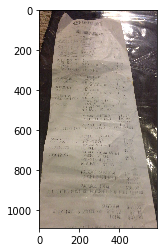

Filename: Dataset/1008.jpg
Top 1 class: Frys conf: 0.9786985
Top 2 class: Target conf: 0.0076362044
Top 3 class: Costco conf: 0.0031850745


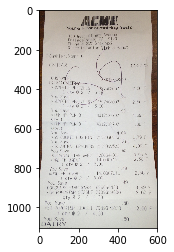

Filename: Dataset/1009.jpg
Top 1 class: WinCoFoods conf: 0.51083153
Top 2 class: JewelOsco conf: 0.32157955
Top 3 class: Meijer conf: 0.05548121


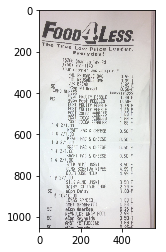

Filename: Dataset/101.jpg
Top 1 class: HyVee conf: 0.5140953
Top 2 class: Walgreens conf: 0.081736974
Top 3 class: BJs conf: 0.07020583


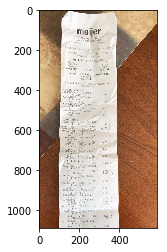

Filename: Dataset/1010.jpg
Top 1 class: Meijer conf: 1.0
Top 2 class: StopShop conf: 1.2786194e-30
Top 3 class: HyVee conf: 6.5197957e-31


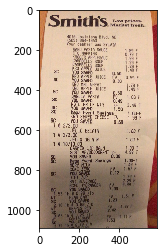

Filename: Dataset/1011.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Frys conf: 3.6732954e-17
Top 3 class: Wegmans conf: 7.912967e-18


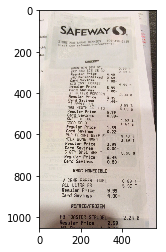

Filename: Dataset/1012.jpg
Top 1 class: Safeway conf: 1.0
Top 2 class: Albertsons conf: 5.0230616e-24
Top 3 class: JewelOsco conf: 6.402742e-25


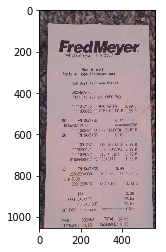

Filename: Dataset/1013.jpg
Top 1 class: FredMeyer conf: 1.0
Top 2 class: Meijer conf: 1.648902e-17
Top 3 class: HyVee conf: 1.4944513e-17


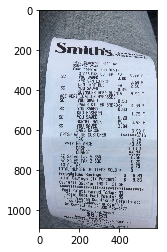

Filename: Dataset/1014.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: CVSPharmacy conf: 2.149544e-21
Top 3 class: Wegmans conf: 2.0120424e-22


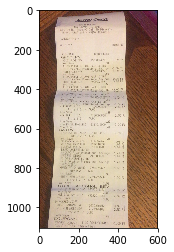

Filename: Dataset/1015.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: WinCoFoods conf: 4.6674496e-27
Top 3 class: Walgreens conf: 4.1756156e-27


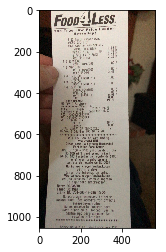

Filename: Dataset/1016.jpg
Top 1 class: BJs conf: 0.44716144
Top 2 class: Publix conf: 0.29967892
Top 3 class: HEB conf: 0.113543734


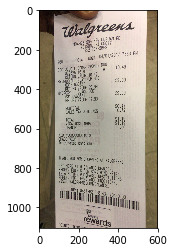

Filename: Dataset/1017.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: FredMeyer conf: 1.803021e-20
Top 3 class: Publix conf: 3.8376212e-22


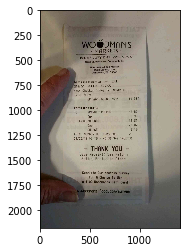

Filename: Dataset/1018.jpg
Top 1 class: KingSoopers conf: 0.40499008
Top 2 class: StopShop conf: 0.2447938
Top 3 class: WholeFoodsMarket conf: 0.20465048


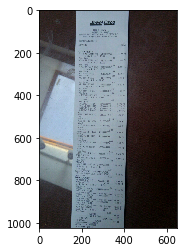

Filename: Dataset/1019.jpg
Top 1 class: JewelOsco conf: 1.0
Top 2 class: HyVee conf: 6.0957855e-31
Top 3 class: ShopRite conf: 4.3472645e-31


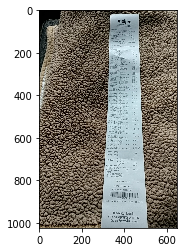

Filename: Dataset/102.jpg
Top 1 class: Meijer conf: 0.99999964
Top 2 class: HyVee conf: 2.0158215e-07
Top 3 class: Target conf: 1.5839998e-07


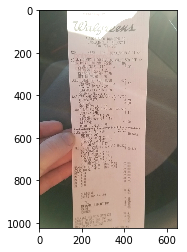

Filename: Dataset/1020.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: FredMeyer conf: 4.3506707e-21
Top 3 class: Publix conf: 3.4002813e-22


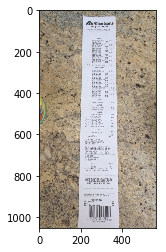

Filename: Dataset/1021.jpg
Top 1 class: Albertsons conf: 1.0
Top 2 class: Walmart conf: 5.34783e-19
Top 3 class: CVSPharmacy conf: 4.736325e-19


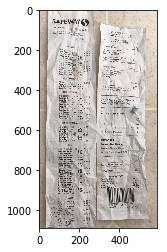

Filename: Dataset/1022.jpg
Top 1 class: Safeway conf: 1.0
Top 2 class: StopShop conf: 6.595309e-18
Top 3 class: Albertsons conf: 5.10806e-18


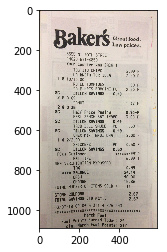

Filename: Dataset/1023.jpg
Top 1 class: Smiths conf: 1.0
Top 2 class: Frys conf: 6.906501e-14
Top 3 class: Wegmans conf: 1.3373517e-15


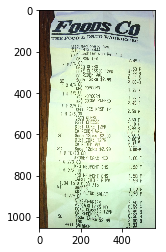

Filename: Dataset/1024.jpg
Top 1 class: KingSoopers conf: 0.63716733
Top 2 class: Walgreens conf: 0.17743823
Top 3 class: HarrisTeeter conf: 0.053681612


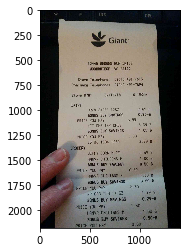

Filename: Dataset/1025.jpg
Top 1 class: StopShop conf: 1.0
Top 2 class: Target conf: 3.672199e-19
Top 3 class: Walmart conf: 3.4965325e-19


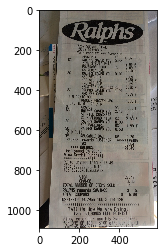

Filename: Dataset/1026.jpg
Top 1 class: HEB conf: 0.45870775
Top 2 class: Kroger conf: 0.32406753
Top 3 class: Walgreens conf: 0.09180508


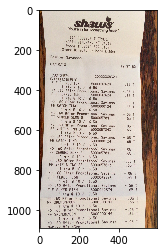

Filename: Dataset/1027.jpg
Top 1 class: JewelOsco conf: 0.99998164
Top 2 class: Publix conf: 4.5347406e-06
Top 3 class: Costco conf: 2.6432097e-06


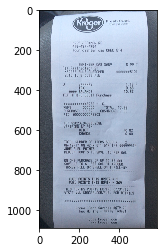

Filename: Dataset/1028.jpg
Top 1 class: Kroger conf: 1.0
Top 2 class: Target conf: 2.8781902e-18
Top 3 class: Frys conf: 2.4619873e-18


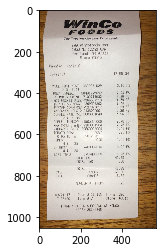

Filename: Dataset/1029.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: Costco conf: 2.152384e-20
Top 3 class: HyVee conf: 3.7291825e-22


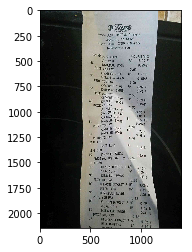

Filename: Dataset/103.jpg
Top 1 class: JewelOsco conf: 0.9659901
Top 2 class: Walgreens conf: 0.01514419
Top 3 class: ShopRite conf: 0.004726434


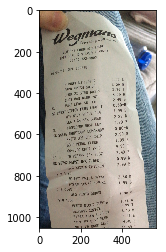

Filename: Dataset/1030.jpg
Top 1 class: Wegmans conf: 1.0
Top 2 class: Smiths conf: 1.3646106e-19
Top 3 class: Safeway conf: 1.0290051e-20


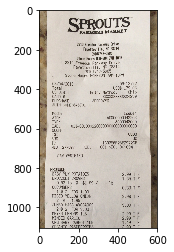

Filename: Dataset/1031.jpg
Top 1 class: Costco conf: 0.83579826
Top 2 class: WholeFoodsMarket conf: 0.10116198
Top 3 class: Wegmans conf: 0.014213176


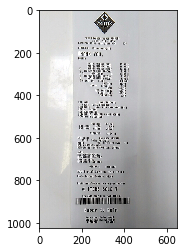

Filename: Dataset/1032.jpg
Top 1 class: SamsClub conf: 1.0
Top 2 class: Albertsons conf: 6.411332e-14
Top 3 class: Safeway conf: 4.4898684e-15


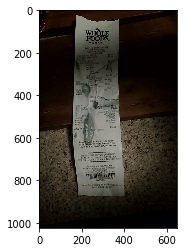

Filename: Dataset/1033.jpg
Top 1 class: WholeFoodsMarket conf: 1.0
Top 2 class: Meijer conf: 2.9516306e-18
Top 3 class: StopShop conf: 2.8172394e-18


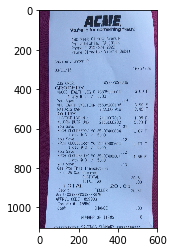

Filename: Dataset/1034.jpg
Top 1 class: JewelOsco conf: 0.9945209
Top 2 class: WinCoFoods conf: 0.0048072673
Top 3 class: Target conf: 0.00014649029


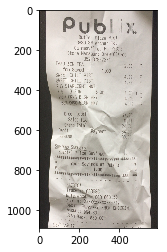

Filename: Dataset/1035.jpg
Top 1 class: Publix conf: 1.0
Top 2 class: Frys conf: 4.535796e-16
Top 3 class: Safeway conf: 3.8799234e-16


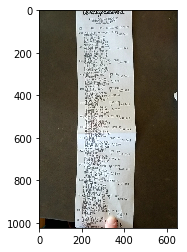

Filename: Dataset/1036.jpg
Top 1 class: Walgreens conf: 1.0
Top 2 class: FredMeyer conf: 2.8307778e-20
Top 3 class: Publix conf: 5.064588e-22


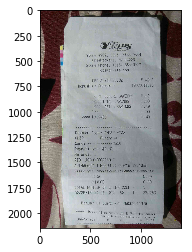

Filename: Dataset/1037.jpg
Top 1 class: StopShop conf: 0.14200477
Top 2 class: Costco conf: 0.12663743
Top 3 class: JewelOsco conf: 0.0912265


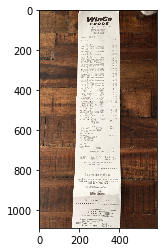

Filename: Dataset/1038.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: Costco conf: 3.944081e-21
Top 3 class: HyVee conf: 1.402378e-22


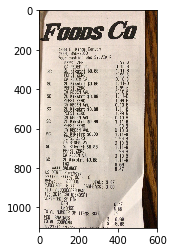

Filename: Dataset/1039.jpg
Top 1 class: Walgreens conf: 0.4255208
Top 2 class: Smiths conf: 0.36232272
Top 3 class: FredMeyer conf: 0.09191821


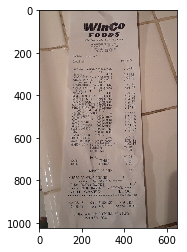

Filename: Dataset/104.jpg
Top 1 class: WinCoFoods conf: 1.0
Top 2 class: Costco conf: 3.4120618e-17
Top 3 class: HyVee conf: 3.171957e-18


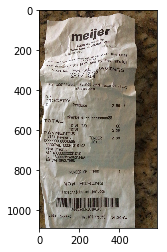

Filename: Dataset/1040.jpg
Top 1 class: Meijer conf: 1.0
Top 2 class: HyVee conf: 4.2645414e-26
Top 3 class: FredMeyer conf: 4.195016e-26


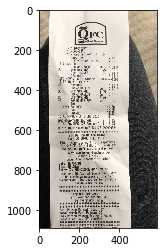

Filename: Dataset/1041.jpg
Top 1 class: ShopRite conf: 0.9999981
Top 2 class: KingSoopers conf: 1.5187093e-06
Top 3 class: BJs conf: 4.0045623e-07


In [35]:
plt.figure()
for i in range(50):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    plt.imshow(img)
    plt.show()
    top3 = list(reversed(sorted(predict[i])[-3:]))
    top3_arg = np.argsort(predict[i])[-3:]
    print("Filename:", gen_flow.filenames[i])
    for j, class_indice in enumerate(reversed(top3_arg)):
        print("Top", (j+1), "class:", class_labels[class_indice], "conf:", top3[j])

In [36]:
def get_class(index):
    top3 = list(reversed(sorted(predict[index])[-3:]))
    top3_arg = np.argsort(predict[index])[-3:]
    out = None
    if top3[0] < 0.995 or top3[1] > 1e-9:
        out = "Other"
    else:
        out = class_labels[top3_arg[2]]
    return out

In [29]:
for i, predicted in enumerate(range(50)):
    img = Image.open(os.path.join(DATASET_PATH, gen_flow.filenames[i]))
    filename = gen_flow.filenames[i].split("/")[1]
    img_class = get_class(i)
    path = os.path.join(OUTPUT_PATH, img_class)
    path = os.path.join(path, filename)
    img.save(path)

In [39]:
data = {}
for i, predicted in enumerate(predicted_classes):
    img_class = get_class(i)
    filename = int(gen_flow.filenames[i].split("/")[1].split(".")[0])
    data[filename] = img_class

print(data)
lines = []
for i in range(10000):
    lines.append(data[i])
print(lines)

{0: 'Smiths', 1: 'Target', 2: 'Other', 3: 'Other', 4: 'ShopRite', 5: 'Walgreens', 6: 'HarrisTeeter', 7: 'Other', 8: 'Safeway', 9: 'Smiths', 10: 'SamsClub', 11: 'Other', 12: 'Other', 13: 'Other', 14: 'Other', 15: 'Other', 16: 'KingSoopers', 17: 'Other', 18: 'Other', 19: 'Other', 20: 'Other', 21: 'Other', 22: 'CVSPharmacy', 23: 'Other', 24: 'Target', 25: 'Other', 26: 'CVSPharmacy', 27: 'Other', 28: 'Safeway', 29: 'Other', 30: 'HEB', 31: 'Meijer', 32: 'HarrisTeeter', 33: 'Other', 34: 'CVSPharmacy', 35: 'ShopRite', 36: 'Meijer', 37: 'Meijer', 38: 'Other', 39: 'Other', 40: 'Walmart', 41: 'Kroger', 42: 'StopShop', 43: 'Other', 44: 'SamsClub', 45: 'Safeway', 46: 'Albertsons', 47: 'Other', 48: 'WholeFoodsMarket', 49: 'Safeway', 50: 'StopShop', 51: 'Other', 52: 'Other', 53: 'Other', 54: 'Other', 55: 'Walmart', 56: 'Other', 57: 'JewelOsco', 58: 'Target', 59: 'Other', 60: 'ShopRite', 61: 'Smiths', 62: 'Other', 63: 'Other', 64: 'Target', 65: 'HarrisTeeter', 66: 'Wegmans', 67: 'FredMeyer', 68: 'Oth

In [40]:
with open('output.csv','w') as file:
    for line in lines:
        file.write(line)
        file.write('\n')